In [1]:
import cv2
import shutil
import numpy as np

from sklearn.metrics import accuracy_score
from scipy.spatial import distance as dist 
import dlib
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join


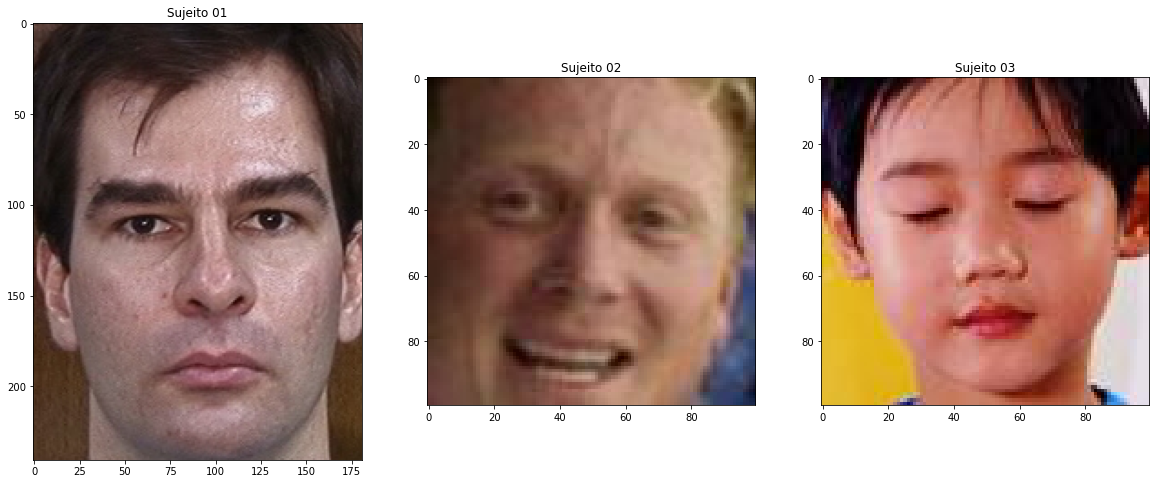

In [2]:
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces_lais/Aaron_Guiel_0001.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces_lais/closed_eye_0382.jpg_face_1.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [3]:
imagem_face_1.shape

(241, 181, 3)

In [4]:
imagem_face_2.shape

(100, 100, 3)

In [5]:
imagem_face_3.shape

(100, 100, 3)

In [6]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [7]:
lista_arq_faces[0]

's01_01.jpg'

In [8]:
len(lista_arq_faces)

750

In [9]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <=10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [10]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (100, 100), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [11]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [12]:
lista_faces_treino[0]

's01_01.jpg'

In [13]:
lista_faces_teste[0]

's01_11.jpg'

In [14]:
dados_treinamento, sujeitos = [], []

In [15]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [16]:
len(dados_treinamento)

750

In [17]:
len(sujeitos)

750

In [18]:
dados_teste, sujeitos_teste = [], [] 

In [19]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [20]:
len(dados_teste)

250

In [21]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

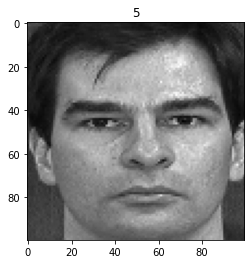

In [22]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '1')

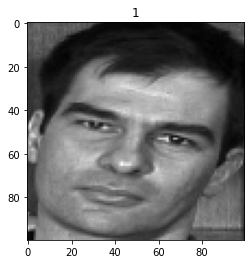

In [23]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

In [24]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [25]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [26]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

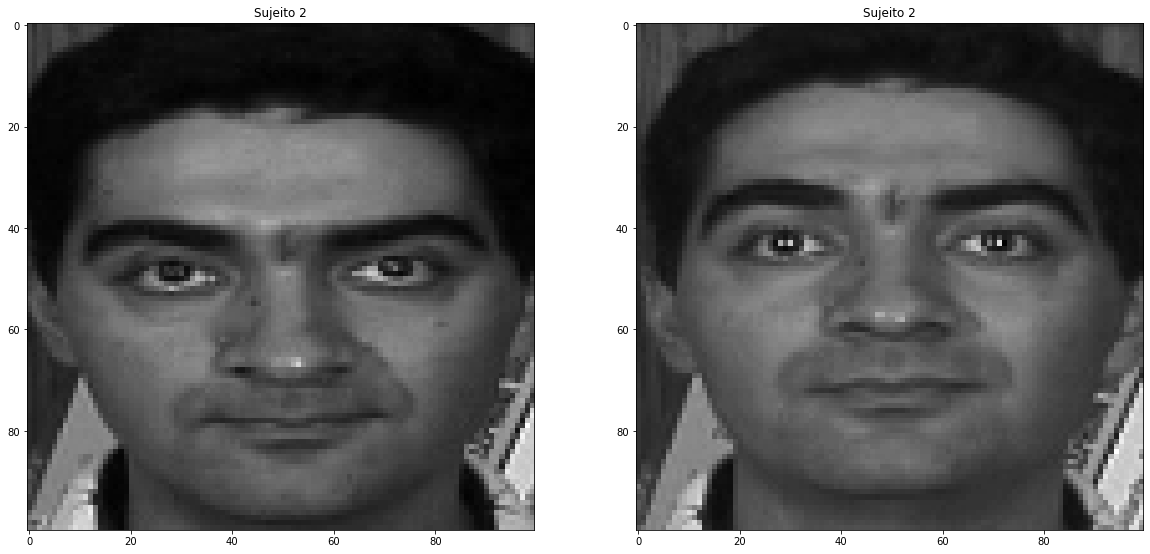

In [27]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")
          
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()
          
         

In [28]:
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao

(2, 0.0)

In [29]:
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao

(2, 0.0)

In [30]:
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(2, 0.0)

In [31]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [32]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

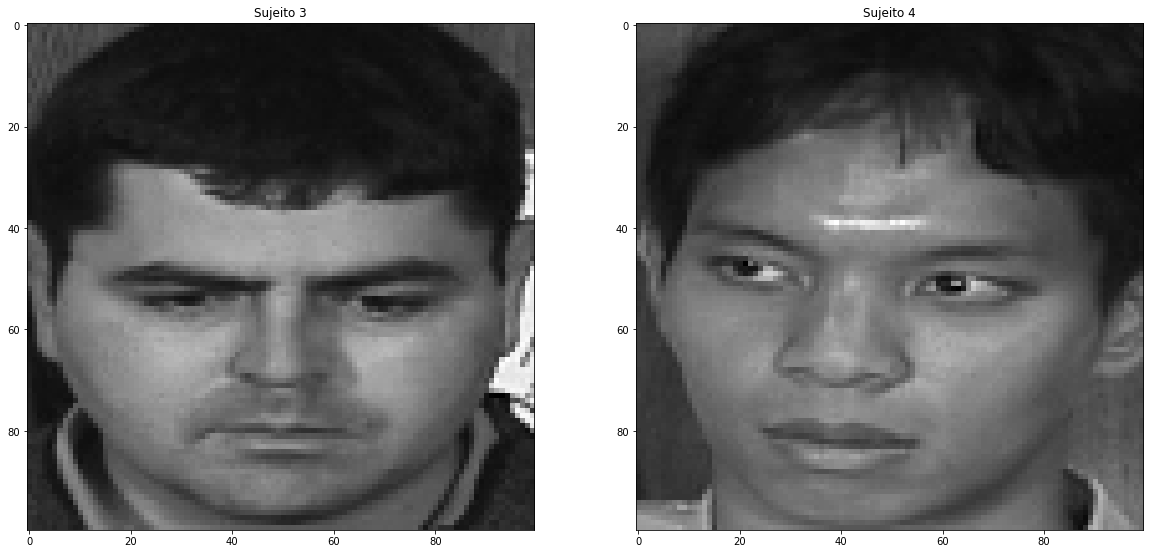

In [33]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")
          
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [34]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(3, 0.0)

In [35]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(4, 0.0)

In [36]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [37]:
modelo_lbph.train(dados_treinamento, sujeitos)

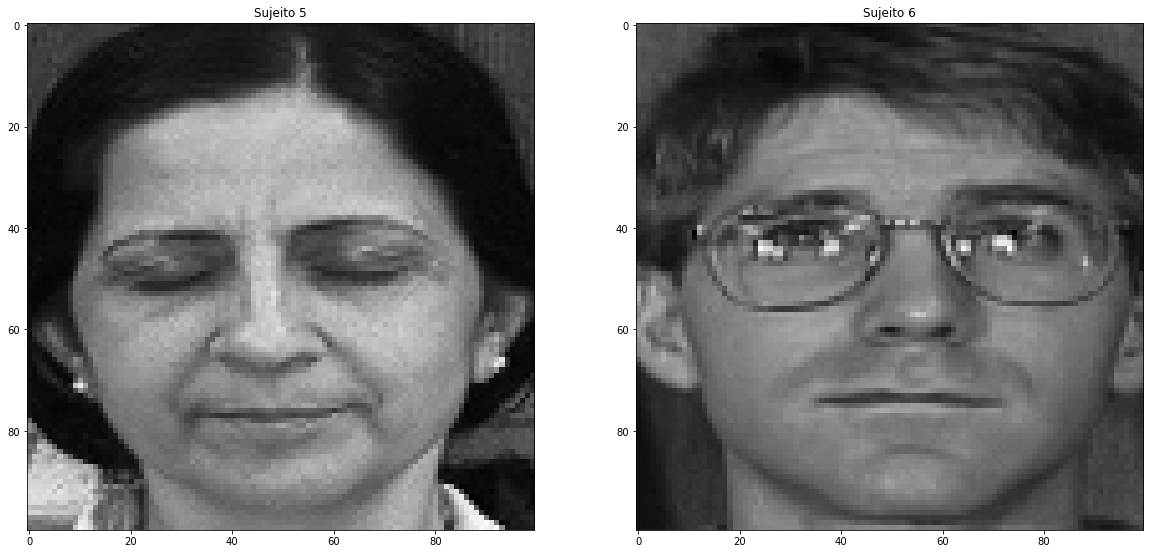

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")
          
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [39]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 0.0)

In [40]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 0.0)

In [41]:
y_pred_eingenfaces = []

In [42]:
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [43]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)

In [44]:
acuracia_eingenfaces

1.0

In [45]:
y_pred_fisherfaces = []

In [46]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [47]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)

In [48]:
acuracia_fisherfaces

1.0

In [49]:
y_pred_lbph = []

In [50]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [51]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [52]:
acuracia_lbph

1.0

In [53]:
imagem = cv2.imread("imagens/cropped_faces_lais/Aaron_Guiel_0001.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

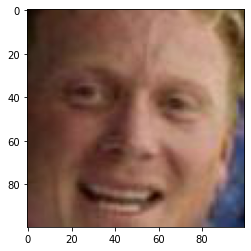

In [54]:
plt.figure(figsize=(8,4))
plt.imshow(imagem)

In [55]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [56]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem

In [57]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


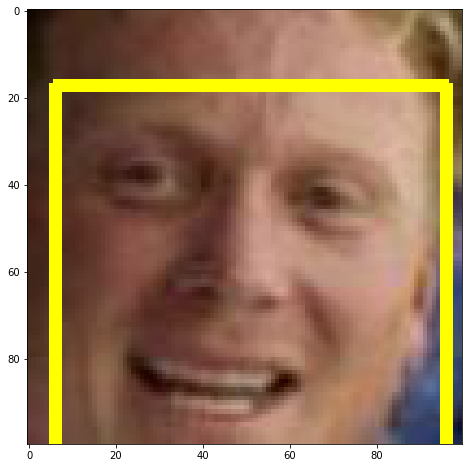

In [60]:
plt.figure(figsize=(8,8))
plt.imshow(imagem_anotada)

In [61]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

In [62]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [63]:
len(marcos_faciais)

1

In [64]:
len(marcos_faciais[0])

68

In [65]:
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    
    return imagem

In [66]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

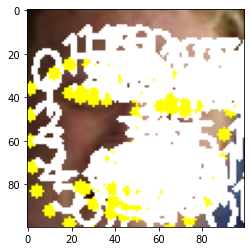

In [67]:
plt.figure(figsize=(8,4))
plt.imshow(imagem_anotada)

In [68]:
imagem_pessoa = cv2.imread("imagens/px-man-happy.jpg")
imagem_pessoa = cv2.cvtColor(imagem_pessoa, cv2.COLOR_BGR2RGB)

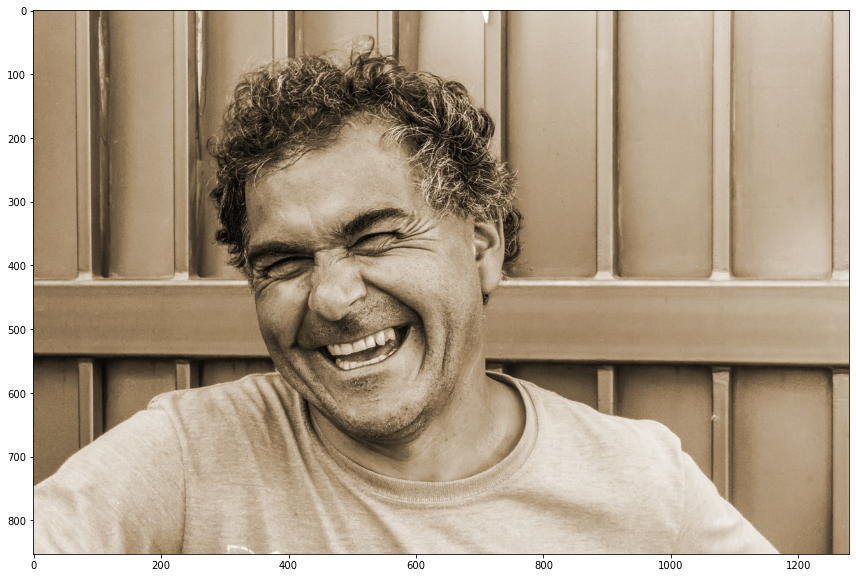

In [69]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa)

In [70]:
imagem_anotada = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada)
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

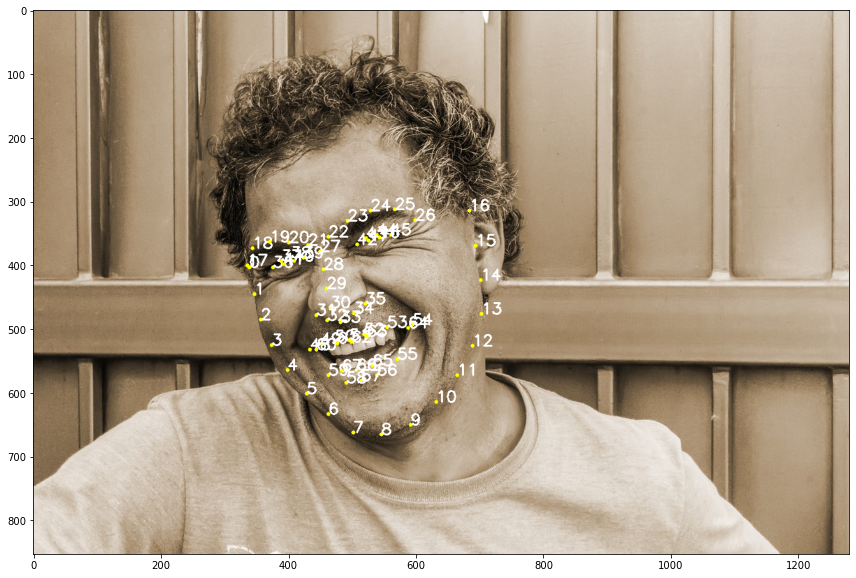

In [71]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [72]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))

In [73]:
def aspecto_razao_olhos(pontos_olhos):
    
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao

In [74]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco[OLHO_ESQUERDO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
        
        pontos = cv2.convexHull(marco[OLHO_DIREITO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem

In [75]:
imagem_anotada = imagem_pessoa.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

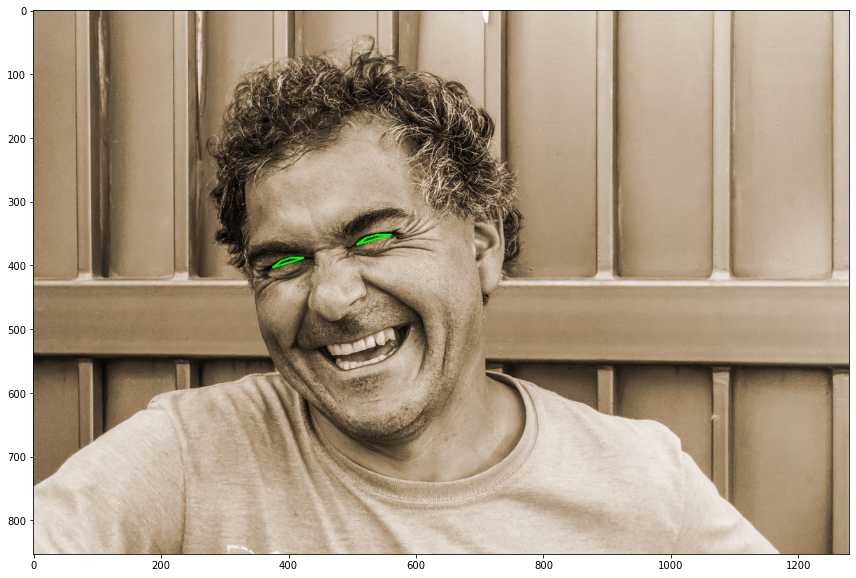

In [76]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [77]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.10269923319261938

In [78]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.13396715136722953

In [79]:
imagem_pessoa_seria = cv2.imread("imagens/cropped_faces_lais/closed_eye_0382.jpg_face_1.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

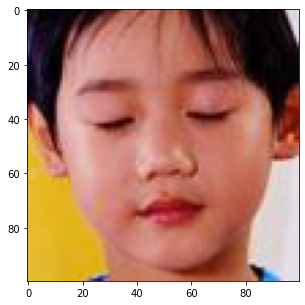

In [80]:
plt.figure(figsize=(10,5))
plt.imshow(imagem_pessoa_seria)

In [81]:
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)

In [82]:
imagem_anotada = imagem_pessoa_seria.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

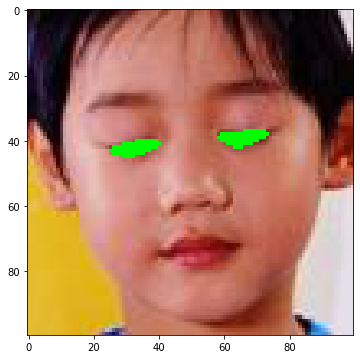

In [85]:
plt.figure(figsize=(8,6))
plt.imshow(imagem_anotada)

In [86]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.13092911333940108

In [87]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.1610311422417263

In [88]:
imagem_pessoa_seria = cv2.imread("imagens/cropped_faces_lais/Aaron_Guiel_0001.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

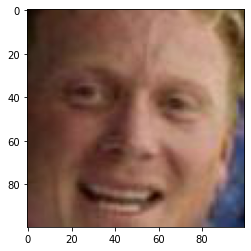

In [90]:
plt.figure(figsize=(8,4))
plt.imshow(imagem_pessoa_seria)

In [91]:
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)

In [92]:
imagem_anotada = imagem_pessoa_seria.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

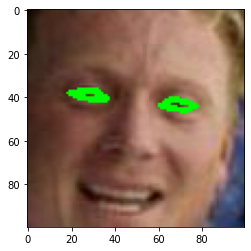

In [93]:
plt.figure(figsize=(8,4))
plt.imshow(imagem_anotada)

In [94]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.2538470508005519

In [95]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.2110154611626203

In [96]:
imagem_pessoa_seria = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

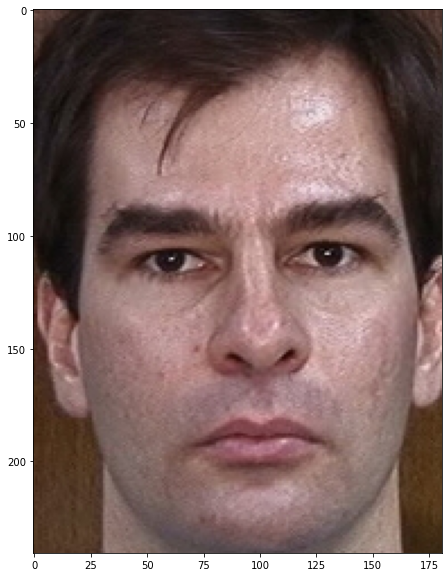

In [97]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa_seria)

In [98]:
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)

In [99]:
imagem_anotada = imagem_pessoa_seria.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

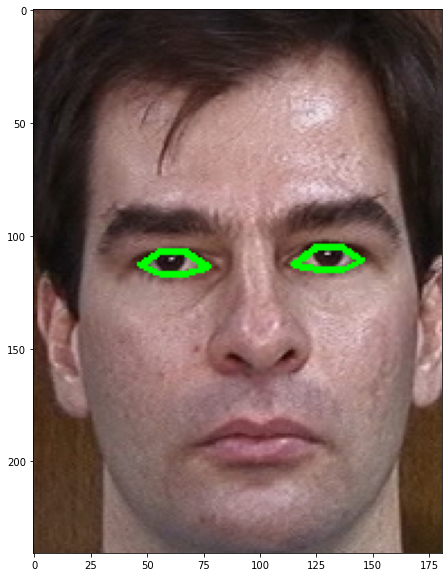

In [100]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [101]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.3342538911019798

In [102]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.33314830232638476

In [103]:
imagem_pessoa_seria = cv2.imread("imagens/px-woman-smilings.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

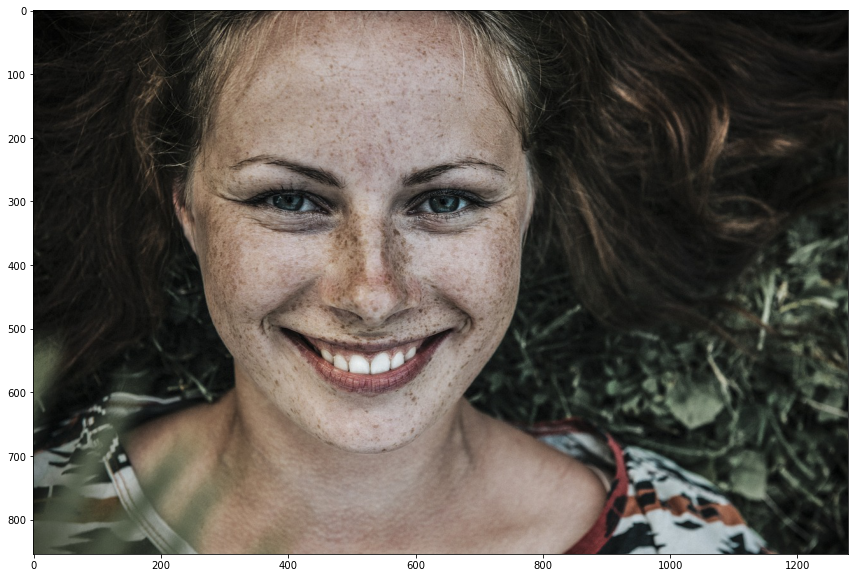

In [104]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa_seria)

In [105]:
imagem_anotada = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)
imagem_anotada = anotar_marcos_faciais(imagem_pessoa_seria, marcos_faciais)

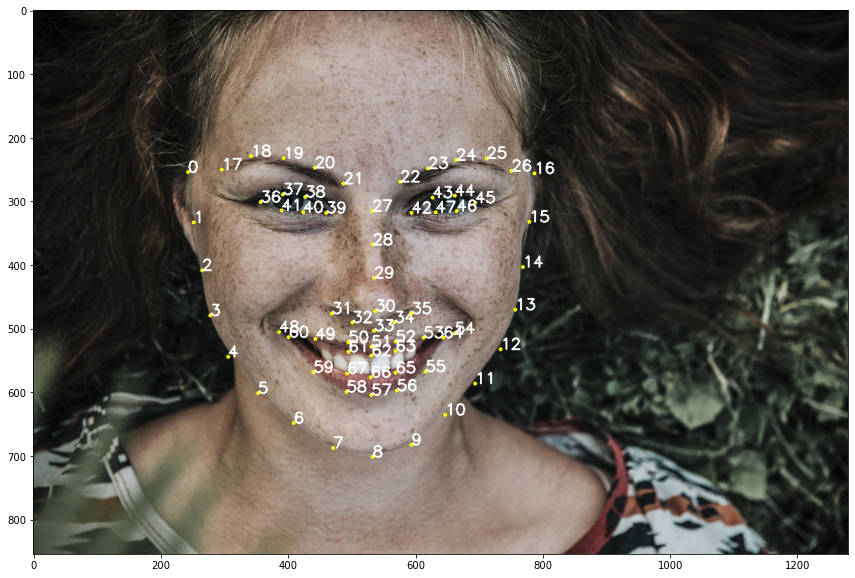

In [106]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa_seria)

In [107]:
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)

In [108]:
imagem_anotada = imagem_pessoa_seria.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

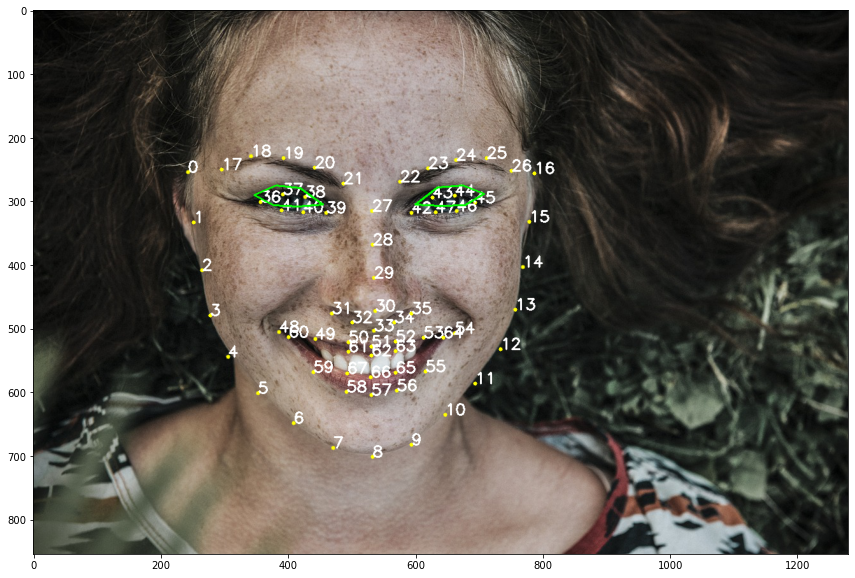

In [109]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [110]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.27631715416550884

In [111]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.2770249082959358